# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
import json
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/forecast?"# YOUR CODE HERE
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}&units=metric"#requests.get(url+city).json()# YOUR CODE HERE
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE
        # print('\n\n',city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['city']['coord']['lat']# YOUR CODE HERE
        # print('city_lat: ',city_lat)
        city_lng = city_weather['city']['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['list'][0]['main']['temp_max']# YOUR CODE HERE
        # print("city_max_temp: ",city_max_temp)
        city_humidity = city_weather['list'][0]['main']['humidity']# YOUR CODE HERE
        # print('clouds: city_humidity')
        city_clouds = city_weather['list'][0]['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['list'][0]['wind']['speed']# YOUR CODE HERE
        city_country = city_weather['city']['country']# YOUR CODE HERE
        city_date = city_weather['list'][0]['dt_txt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | saleaula
City not found. Skipping...
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | deputatskiy
Processing Record 8 of Set 1 | dabat
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | saint-augustin
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | lanigan
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | kedrovyy
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | ahipara
Processing Record 20 of Set 1 | mount isa
Processing Record 21 of Set 1 | airai


In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,-15.84,74,75,1.21,RU,2023-04-05 06:00:00
1,cape town,-33.9258,18.4232,17.60,78,0,1.75,ZA,2023-04-05 06:00:00
2,ushuaia,-54.8000,-68.3000,6.60,82,33,3.25,AR,2023-04-05 06:00:00
3,deputatskiy,69.3000,139.9000,-13.26,91,100,1.35,RU,2023-04-05 06:00:00
4,dabat,12.9842,37.7650,18.62,24,99,2.52,ET,2023-04-05 06:00:00


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,-15.84,74,75,1.21,RU,2023-04-05 06:00:00
1,cape town,-33.9258,18.4232,17.60,78,0,1.75,ZA,2023-04-05 06:00:00
2,ushuaia,-54.8000,-68.3000,6.60,82,33,3.25,AR,2023-04-05 06:00:00
3,deputatskiy,69.3000,139.9000,-13.26,91,100,1.35,RU,2023-04-05 06:00:00
4,dabat,12.9842,37.7650,18.62,24,99,2.52,ET,2023-04-05 06:00:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

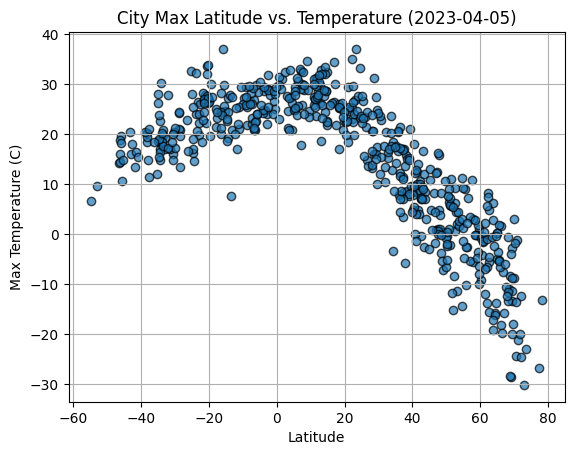

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter('Lat', 'Max Temp', data=city_data_df, alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature ({})'.format(city_data_df['Date'][0][:10]))
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

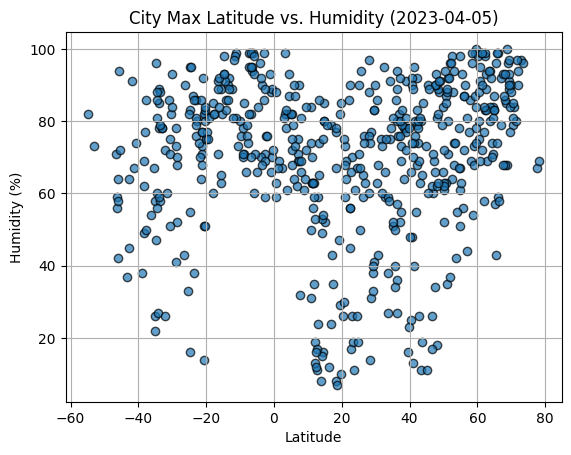

In [44]:
# Build the scatter plots for latitude vs. humidity
plt.scatter('Lat', 'Humidity', data=city_data_df, alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity ({})'.format(city_data_df['Date'][0][:10]))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

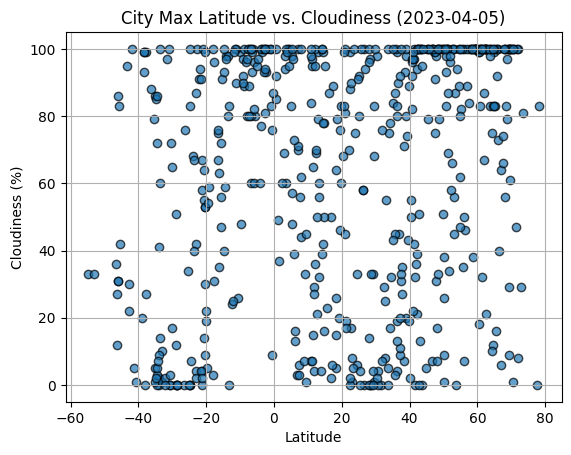

In [45]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter('Lat', 'Cloudiness', data=city_data_df, alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness ({})'.format(city_data_df['Date'][0][:10]))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

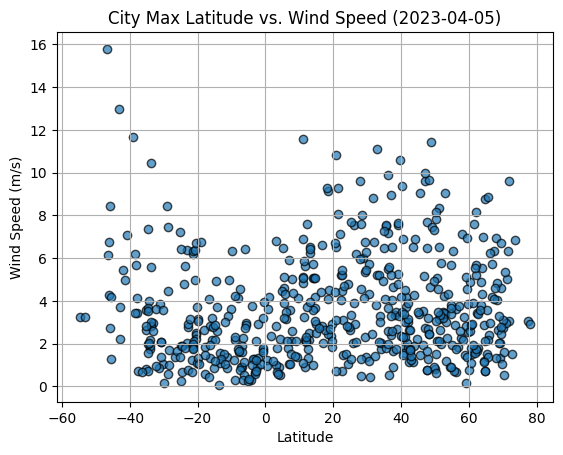

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter('Lat', 'Wind Speed', data=city_data_df, alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed ({})'.format(city_data_df['Date'][0][:10]))
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Define a function to create Linear Regression plots
def linearRegression(x, y):
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = linregress(x ,y) 
    predicted_latitude = pe_slope * x + pe_int 
    return (predicted_latitude, pe_slope, pe_int, pe_r)

In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df [city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,-15.84,74,75,1.21,RU,2023-04-05 06:00:00
3,deputatskiy,69.3000,139.9000,-13.26,91,100,1.35,RU,2023-04-05 06:00:00
4,dabat,12.9842,37.7650,18.62,24,99,2.52,ET,2023-04-05 06:00:00
5,hamilton,39.1834,-84.5333,21.05,78,74,5.27,US,2023-04-05 06:00:00
7,saint-augustin,51.2260,-58.6502,-2.09,92,100,8.33,CA,2023-04-05 06:00:00


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df [city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cape town,-33.9258,18.4232,17.60,78,0,1.75,ZA,2023-04-05 06:00:00
2,ushuaia,-54.8000,-68.3000,6.60,82,33,3.25,AR,2023-04-05 06:00:00
6,atuona,-9.8000,-139.0333,27.21,76,48,6.33,PF,2023-04-05 06:00:00
8,bluff,-46.6000,168.3333,14.26,71,36,15.79,NZ,2023-04-05 06:00:00
12,hermanus,-34.4187,19.2345,16.95,81,0,4.00,ZA,2023-04-05 06:00:00


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9039318366492315


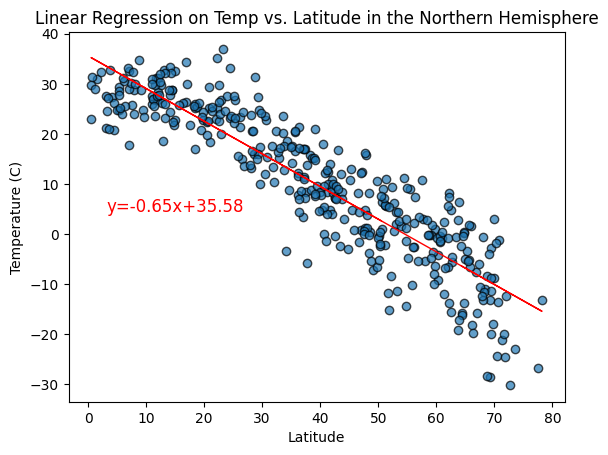

In [74]:
# Linear regression on Northern Hemisphere
predicted_temp_n, slope, y_int, r_val = linearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Max Temp', data=northern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(northern_hemi_df['Lat'], predicted_temp_n, color="red", linewidth=1)
plt.text(3+0.2, 4.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Linear Regression on Temp vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

The r-value is: 0.620734452315275


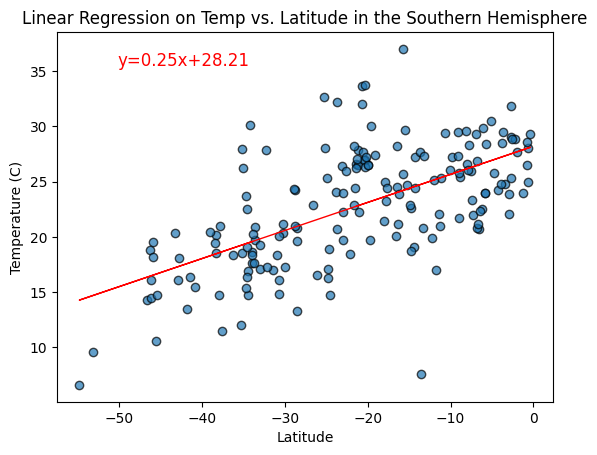

In [86]:
# Linear regression on Southern Hemisphere
predicted_temp_s, slope, y_int, r_val = linearRegression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Max Temp', data=southern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(southern_hemi_df['Lat'], predicted_temp_s, color="red", linewidth=1)
plt.text(-50.2, 35.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Linear Regression on Temp vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)');

**Discussion about the linear relationship:** 
<br>
As we can see, there is a positive correlation of the max temperature and latitude in the southern hemisphere. We also see a negative correlation for max temperature and latitude given we are in the northern hemisphere. There is certainly a stronger correlation in the northern hemisphere as we can see from our linear regression model which we plotted that has a -0.9 r-value. As for the Southern hemisphere, there is a weaker correlation being that our data is a bit more spread out as calculated by our r-value of 0.6.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34996446952392024


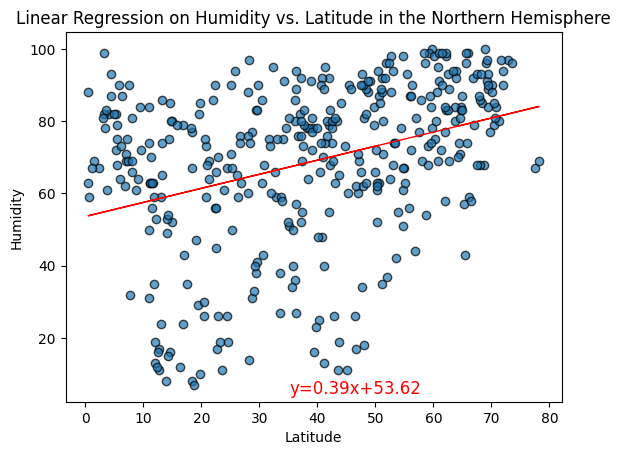

In [92]:
# Northern Hemisphere
predicted_humidity_n, slope, y_int, r_val = linearRegression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Humidity', data=northern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(northern_hemi_df['Lat'], predicted_humidity_n, color="red", linewidth=1)
plt.text(35.2, 4.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Linear Regression on Humidity vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.3857086399727879


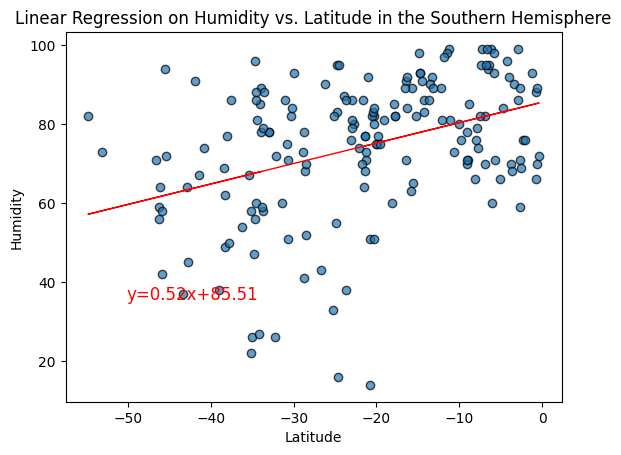

In [93]:
# Southern Hemisphere
predicted_humidity_s, slope, y_int, r_val = linearRegression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Humidity', data=southern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(southern_hemi_df['Lat'], predicted_humidity_s, color="red", linewidth=1)
plt.text(-50.2, 35.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Linear Regression on Humidity vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity');

**Discussion about the linear relationship:** 
<br><br>
Calculating linear regression onto our two features Latitude and Humidity, we can see a positive correlation for both northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22904282438886522


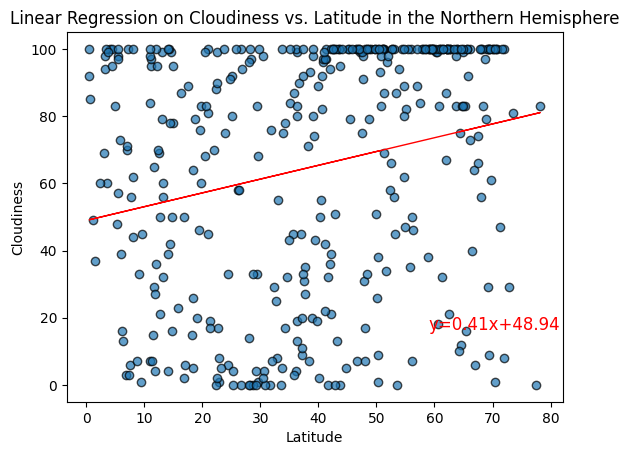

In [103]:
# Northern Hemisphere
predicted_Cloudiness_n, slope, y_int, r_val = linearRegression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Cloudiness', data=northern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(northern_hemi_df['Lat'], predicted_Cloudiness_n, color="red", linewidth=1)
plt.text(59, 16.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Linear Regression on Cloudiness vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.4681858306451592


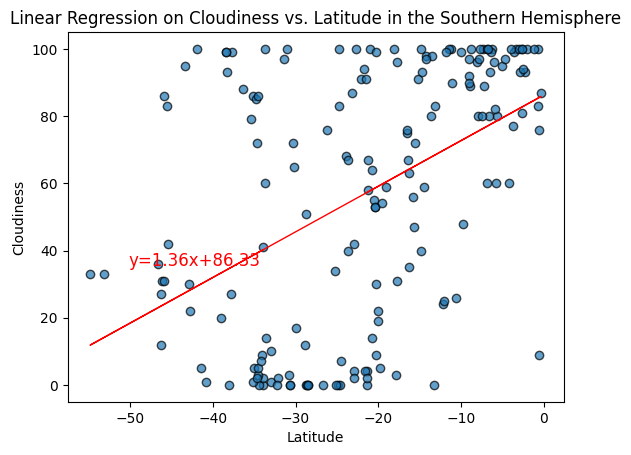

In [104]:
# Southern Hemisphere
predicted_humidity_s, slope, y_int, r_val = linearRegression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Cloudiness', data=southern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(southern_hemi_df['Lat'], predicted_humidity_s, color="red", linewidth=1)
plt.text(-50.2, 35.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Linear Regression on Cloudiness vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness');

**Discussion about the linear relationship:** 
<br><br>
The two plots above show that there is a stronger correlation in the southern hemisphere over the northern hemisphere with respect to Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.008635778979296562


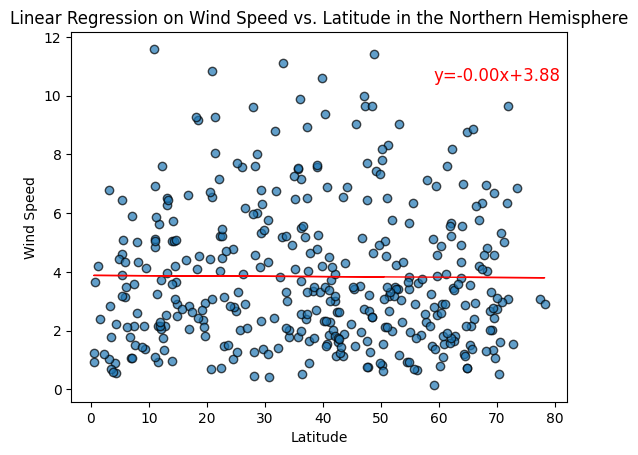

In [111]:
# Northern Hemisphere
predicted_WindSpeed_n, slope, y_int, r_val = linearRegression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Wind Speed', data=northern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(northern_hemi_df['Lat'], predicted_WindSpeed_n, color="red", linewidth=1)
plt.text(59, 10.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Linear Regression on Wind Speed vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.39340619729657095


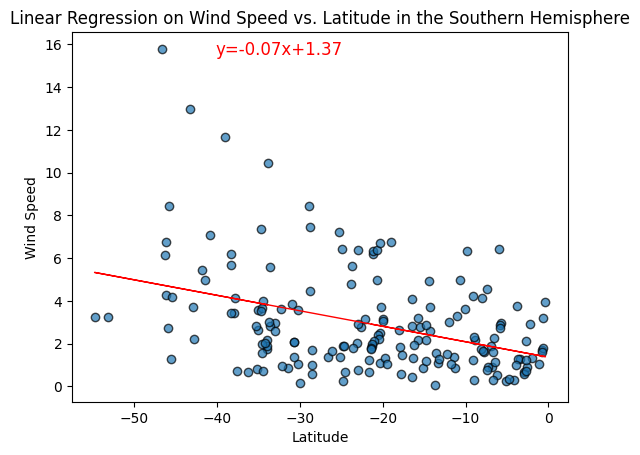

In [110]:
# Southern Hemisphere
predicted_WindSpeed_s, slope, y_int, r_val = linearRegression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
print("The r-value is: {}".format(r_val))
plt.scatter('Lat', 'Wind Speed', data=southern_hemi_df, alpha=0.7, edgecolor='black')
plt.plot(southern_hemi_df['Lat'], predicted_WindSpeed_s, color="red", linewidth=1)
plt.text(-40.2, 15.5,'y={:.2f}x+{:.2f}'.format(slope, y_int), size='large', color='red')
plt.title('Linear Regression on Wind Speed vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed');

**Discussion about the linear relationship:** 
<br><br>
We can see that for features Wind Speed and Latitude given the northern hemisphere, there is a weak correlation. This is because we simply have a horizontal line with a very insignificant r-value.<br>As for the Southern hemisphere, we can see that there is a very small negative correlation with an r-value of -0.3